# Fleet data per country

All data sourced from the European Alternative Fuels (AF) Observatory:

[country_identifier]_psg_vehicle_fleetdata:
AF Fleet percentage of total fleet (M1)
Fleet of alternative fuelled (BEV, PHEV, H2, LPG, CNG, LNG) passenger cars as a percentage of the total fleet.

[country_identifier]_psg_vehicle_fleetdata:
AF New registrations (M1)
Number of newly registered alternative fuelled (BEV, PHEV, H2, LPG, CNG, LNG) passenger cars (M1).

[country_identifier]_psg_vehicle_fleetdata:
AF Market share of total registrations (M1)
Newly registered alternative fuelled (BEV, PHEV, H2, LPG, CNG, LNG) passenger cars as a percentage of the total number of registrations.

In [1]:
import pandas as pd
import os

# Debug: Check the current working directory
print("Current Working Directory:", os.getcwd())

# Set the path to the raw data folder
data_path = "../data/raw/fleet_data"  # Relative path to the raw data folder

# Verify if the path exists
if not os.path.exists(data_path):
    print(f"Relative path '{data_path}' not found. Using absolute path instead.")
    data_path = "c:/Users/jskif/OneDrive - epfl.ch/Documents/SMT/DSML/DSML/data/raw"

# List all CSV files in the raw data folder
csv_files = [file for file in os.listdir(data_path) if file.endswith(".csv")]

# Initialize dictionaries to store DataFrames for each file type
newreg_dataframes = {}
eu_dataframes = {}
registrations_dataframes = {}

# Process files based on their type
for file in csv_files:
    country_name = file.split("_")[0]  # Extract country name from the file name
    file_path = os.path.join(data_path, file)

    if file.endswith("newreg.csv"):
        newreg_dataframes[country_name] = pd.read_csv(file_path)
    elif file.endswith("EU.csv"):
        eu_dataframes[country_name] = pd.read_csv(file_path)
    elif file.endswith("registrations.csv"):
        registrations_dataframes[country_name] = pd.read_csv(file_path)

# Combine datasets for each file type
combined_newreg_df = pd.concat(newreg_dataframes.values(), keys=newreg_dataframes.keys(), names=["Country", "Index"]).reset_index()
combined_fleet_df = pd.concat(eu_dataframes.values(), keys=eu_dataframes.keys(), names=["Country", "Index"]).reset_index()
combined_registrations_mktshare_df = pd.concat(registrations_dataframes.values(), keys=registrations_dataframes.keys(), names=["Country", "Index"]).reset_index()

# Display basic information about the combined datasets
print("Combined New Registrations Dataset Info:")
print(combined_newreg_df.info())

print("\nCombined EU Dataset Info:")
print(combined_fleet_df.info())

print("\nCombined Registrations Dataset Info:")
print(combined_registrations_mktshare_df.info())

# Change the name of the Category column in each file to "Year"
combined_newreg_df.rename(columns={"Category": "Year"}, inplace=True)
combined_fleet_df.rename(columns={"Category": "Year"}, inplace=True)
combined_registrations_mktshare_df.rename(columns={"Category": "Year"}, inplace=True)

# Save the combined datasets to the processed folder
processed_path = "../data/processed"
os.makedirs(processed_path, exist_ok=True)

combined_newreg_df.to_csv(os.path.join(processed_path, "combined_newreg_data.csv"), index=False)
combined_fleet_df.to_csv(os.path.join(processed_path, "combined_fleet_data.csv"), index=False)
combined_registrations_mktshare_df.to_csv(os.path.join(processed_path, "combined_registrations_mktshare_data.csv"), index=False)

print(f"Combined datasets saved to {processed_path}/")  

Current Working Directory: c:\Users\jskif\OneDrive - epfl.ch\Documents\SMT\DSML\DSML\src
Combined New Registrations Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   108 non-null    object 
 1   Index     108 non-null    int64  
 2   Category  108 non-null    int64  
 3   BEV       108 non-null    int64  
 4   PHEV      108 non-null    int64  
 5   H2        73 non-null     float64
 6   LPG       39 non-null     float64
 7   CNG       85 non-null     float64
 8   LNG       0 non-null      float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.7+ KB
None

Combined EU Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   96 non-null     object 
 1   Index     96 non-nu

In [3]:
import pandas as pd
import os

data_dir = "../data/processed"
output_dir = "../results"

def prepare_vehicle_data(filename, bev_col='BEV', af_cols=['BEV','PHEV','H2','LPG','CNG','LNG'], suffix=''):
    df = pd.read_csv(os.path.join(data_dir, filename))
    # Ensure columns exist
    cols = [c for c in af_cols if c in df.columns]
    # Group by Country, Year and sum/mean as appropriate
    group_cols = ['Country', 'Year']
    agg_df = df.groupby(group_cols)[cols].sum().reset_index()
    # Create AF column
    agg_df[f'AF{suffix}'] = agg_df[cols].sum(axis=1)
    # Keep only BEV and AF
    out = agg_df[group_cols + [bev_col, f'AF{suffix}']]
    out = out.rename(columns={bev_col: f'BEV{suffix}'})
    return out

# Prepare each vehicle dataset
fleet = prepare_vehicle_data("combined_fleet_data.csv", suffix='_fleet')
newreg = prepare_vehicle_data("combined_newreg_data.csv", suffix='_newreg')
mktshare = prepare_vehicle_data("combined_registrations_mktshare_data.csv", suffix='_mktshare')

# Merge all into one
vehicle_data = fleet.merge(newreg, on=['Country','Year']).merge(mktshare, on=['Country','Year'])
vehicle_data.to_csv(os.path.join(data_dir, "combined_vehicle_data.csv"), index=False)

# Air quality (AQ) data per country

In [ ]:
pip install pandas pyarrow
import pandas as pd
import os

input_folder = "/Users/clarabottinelli/Desktop/PQ_downloads"
output_folder = "/Users/clarabottinelli/Desktop/CSV_downloads"

for file in os.listdir(input_folder):
    if file.endswith(".parquet"):
        df = pd.read_parquet(os.path.join(input_folder, file))
        csv_filename = file.replace(".parquet", ".csv")
        df.to_csv(os.path.join(output_folder, csv_filename), index=False)


In [ ]:
samplingpoint_data = {}

for csv_file in os.listdir(output_folder):
    if csv_file.endswith(".csv"):
        file_path = os.path.join(output_folder, csv_file)
        df = pd.read_csv(file_path)
        
        #group dataframe by Samplingpoint
        for samplingpoint, group in df.groupby("Samplingpoint"):
            if samplingpoint not in samplingpoint_data:
                samplingpoint_data[samplingpoint] = group
            else:
                samplingpoint_data[samplingpoint] = pd.concat([samplingpoint_data[samplingpoint], group], ignore_index=True)

#merge dataframe with datapoints for all Samplingpoints
merged_data = pd.concat(samplingpoint_data.values(), ignore_index=True)
merged_data

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd


### Cleaning dataset

In [ ]:
#identify pollutants corresponding to IDs used by EEA
pollutant_codes = {
    5: "NO",
    7: "CO2",
    8: "NO2",
    9: "PM2.5",
    38: "PM10",
    6001: "NOX as NO2"
}

merged_data['Notation'] = merged_data['Pollutant'].map(pollutant_codes)
merged_data

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [ ]:
print(merged_data['Pollutant'].unique())

[  38    8    7    5 6001    9]


In [ ]:
#convert Start column to datetime and drop rows with NaT values
if not pd.api.types.is_datetime64_any_dtype(merged_data['Start']):
    merged_data['Start'] = pd.to_datetime(merged_data['Start'], errors='coerce', infer_datetime_format=True)

merged_data = merged_data.dropna(subset=['Start'])
merged_data

/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_81053/1018579409.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  merged_data['Start'] = pd.to_datetime(merged_data['Start'], errors='coerce', infer_datetime_format=True)


,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [ ]:
#aggregate sampling points by country
merged_data.insert(0, 'Country', merged_data['Samplingpoint'].str[:2])
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847175,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847176,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847177,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [ ]:
print(merged_data['Country'].value_counts())

Country
AT    4374113
NO    4167809
NL    3541104
CH    1972275
DK     712692
Name: count, dtype: int64


In [ ]:
#drop unnecessary columns
merged_data = merged_data.drop(columns=['ResultTime', 'DataCapture', 'FkObservationLog', 'Validity', 'Verification'])
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,PM10
...,...,...,...,...,...,...,...,...,...
14847174,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,PM2.5
14847175,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,PM2.5
14847176,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,PM2.5
14847177,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,PM2.5


In [ ]:
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,PM10
...,...,...,...,...,...,...,...,...,...
14847174,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,PM2.5
14847175,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,PM2.5
14847176,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,PM2.5
14847177,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,PM2.5


In [ ]:
output_csv_path = os.path.join(output_folder, "merged_data_export.csv")
merged_data.to_csv(output_csv_path, index=False)
print(f"Exported merged_data to {output_csv_path}")

Exported merged_data to /Users/clarabottinelli/Desktop/CSV_downloads/merged_data_export.csv


### 24h average

In [ ]:
# Create a copy of merged_data
merged_data_copy = merged_data.copy()

# Compute daily average of Value for each Pollutant per Country
daily_avg_per_country = (
    merged_data_copy.groupby(['Country', 'Pollutant', 'Start'])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Value': 'DailyAverageValue'})
)

daily_avg_per_country

,Country,Pollutant,Start,DailyAverageValue
0,AT,5,2013-01-01 00:00:00,319.393036
1,AT,5,2013-01-01 01:00:00,297.272252
2,AT,5,2013-01-01 02:00:00,158.900503
3,AT,5,2013-01-01 03:00:00,86.559707
4,AT,5,2013-01-01 04:00:00,59.949791
...,...,...,...,...
2209673,NO,6001,2023-12-31 19:00:00,3.906768
2209674,NO,6001,2023-12-31 20:00:00,4.139576
2209675,NO,6001,2023-12-31 21:00:00,3.564156
2209676,NO,6001,2023-12-31 22:00:00,2.909819


In [ ]:
#summary statistics of daily average values
daily_avg_per_country.describe()

,Pollutant,Start,DailyAverageValue
count,2.209678e+06,2209678,2.209678e+06
mean,9.384940e+02,2019-02-05 11:19:44.730623488,-1.413213e+03
min,5.000000e+00,2008-12-31 23:00:00,-1.167965e+09
25%,7.000000e+00,2016-08-27 19:15:00,6.201582e+00
50%,8.000000e+00,2019-04-30 23:00:00,1.658283e+01
75%,3.800000e+01,2021-08-30 11:00:00,3.630217e+01
max,6.001000e+03,2023-12-31 23:00:00,1.183894e+09
std,2.163275e+03,NaN,1.573824e+06


In [ ]:
# don't think we need to get rid of outliers necessarily
#getting rid of outliers
Q1 = daily_avg_per_country['DailyAverageValue'].quantile(0.25)
Q3 = daily_avg_per_country['DailyAverageValue'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_avg_per_country = daily_avg_per_country[
    (daily_avg_per_country['DailyAverageValue'] >= lower_bound) &
    (daily_avg_per_country['DailyAverageValue'] <= upper_bound)
]

daily_avg_per_country

,Country,Pollutant,Start,DailyAverageValue
4,AT,5,2013-01-01 04:00:00,59.949791
5,AT,5,2013-01-01 05:00:00,52.924208
6,AT,5,2013-01-01 06:00:00,49.834083
7,AT,5,2013-01-01 07:00:00,49.908625
8,AT,5,2013-01-01 08:00:00,51.497500
...,...,...,...,...
2209673,NO,6001,2023-12-31 19:00:00,3.906768
2209674,NO,6001,2023-12-31 20:00:00,4.139576
2209675,NO,6001,2023-12-31 21:00:00,3.564156
2209676,NO,6001,2023-12-31 22:00:00,2.909819


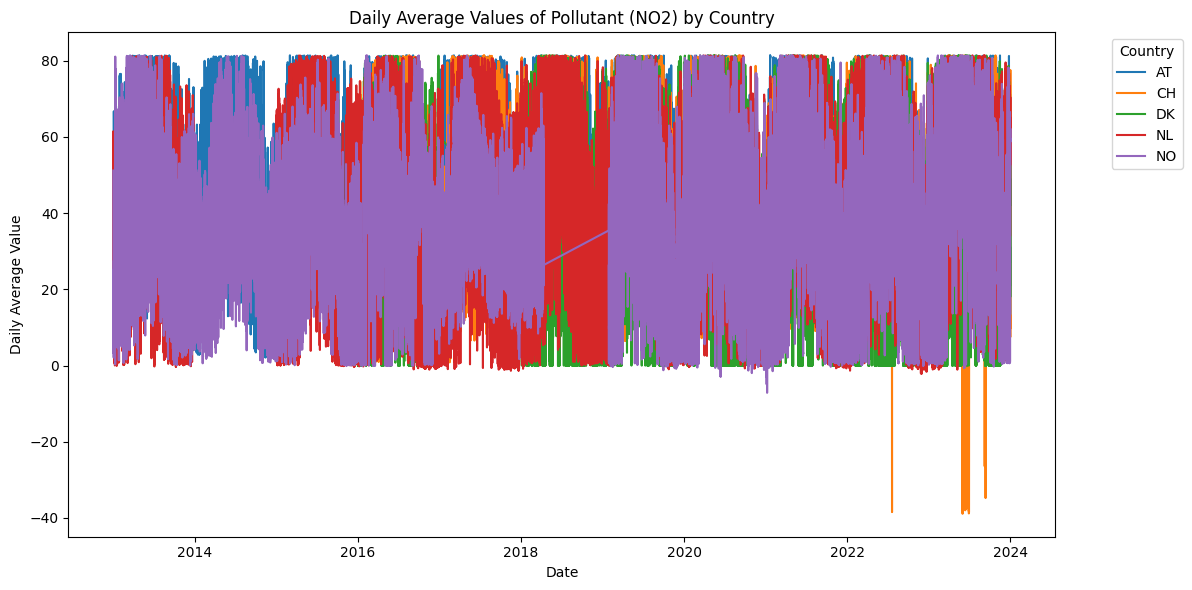

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7 # NO2
filtered_data = daily_avg_per_country[daily_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Start'], country_data['DailyAverageValue'], label=country)

plt.title('Daily Average Values of Pollutant (NO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Day-time avg

In [ ]:
# Filter data for day-time values (08:00:00 to 20:00:00)
day_time_data = merged_data[
    (merged_data['Start'].dt.time >= pd.to_datetime('08:00:00').time()) &
    (merged_data['Start'].dt.time <= pd.to_datetime('20:00:00').time())
]

# Compute daily mean for each pollutant value for each country
daily_daytime_avg_per_country = (
    day_time_data.groupby(['Country', 'Pollutant', day_time_data['Start'].dt.date])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Start': 'Date', 'Value': 'DailyDaytimeAverageValue'})
)

daily_daytime_avg_per_country

,Country,Pollutant,Date,DailyDaytimeAverageValue
0,AT,5,2013-01-01,52.110413
1,AT,5,2013-01-02,25.221235
2,AT,5,2013-01-03,9.707832
3,AT,5,2013-01-04,9.635445
4,AT,5,2013-01-05,3.943111
...,...,...,...,...
92072,NO,6001,2023-12-27,-39.505708
92073,NO,6001,2023-12-28,7.945569
92074,NO,6001,2023-12-29,6.633458
92075,NO,6001,2023-12-30,10.783207


In [ ]:
#summary statistics
summary_stats = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].describe()
print(summary_stats)

#remove outliers
Q1 = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].quantile(0.25)
Q3 = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_daytime_avg_per_country = daily_daytime_avg_per_country[
    (daily_daytime_avg_per_country['DailyDaytimeAverageValue'] >= lower_bound) &
    (daily_daytime_avg_per_country['DailyDaytimeAverageValue'] <= upper_bound)
]

daily_daytime_avg_per_country

count    9.207700e+04
mean    -1.309438e+03
std      4.640776e+05
min     -1.399059e+08
25%      6.921385e+00
50%      1.860801e+01
75%      4.005826e+01
max      1.245011e+07
Name: DailyDaytimeAverageValue, dtype: float64


,Country,Pollutant,Date,DailyDaytimeAverageValue
0,AT,5,2013-01-01,52.110413
1,AT,5,2013-01-02,25.221235
2,AT,5,2013-01-03,9.707832
3,AT,5,2013-01-04,9.635445
4,AT,5,2013-01-05,3.943111
...,...,...,...,...
92072,NO,6001,2023-12-27,-39.505708
92073,NO,6001,2023-12-28,7.945569
92074,NO,6001,2023-12-29,6.633458
92075,NO,6001,2023-12-30,10.783207


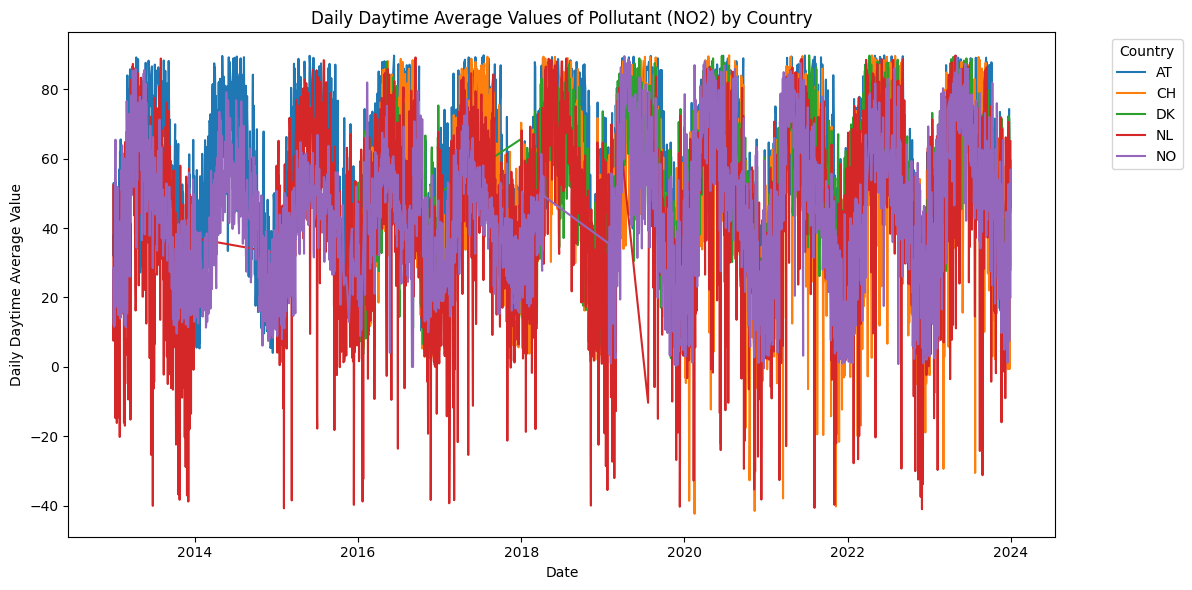

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7  # NO2
filtered_data = daily_daytime_avg_per_country[daily_daytime_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Date'], country_data['DailyDaytimeAverageValue'], label=country)

plt.title('Daily Daytime Average Values of Pollutant (NO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Daytime Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Peak-traffic hour windows

In [ ]:
# Filter data for the specified time ranges
peak_traffic_data = merged_data[
    ((merged_data['Start'].dt.time >= pd.to_datetime('06:00:00').time()) & 
     (merged_data['Start'].dt.time <= pd.to_datetime('10:00:00').time())) |
    ((merged_data['Start'].dt.time >= pd.to_datetime('16:00:00').time()) & 
     (merged_data['Start'].dt.time <= pd.to_datetime('20:00:00').time()))
]

# Compute daily mean for each pollutant value for each country
daily_peak_traffic_avg_per_country = (
    peak_traffic_data.groupby(['Country', 'Pollutant', peak_traffic_data['Start'].dt.date])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Start': 'Date', 'Value': 'DailyPeakTrafficAverageValue'})
)

daily_peak_traffic_avg_per_country

,Country,Pollutant,Date,DailyPeakTrafficAverageValue
0,AT,5,2013-01-01,51.586312
1,AT,5,2013-01-02,31.677111
2,AT,5,2013-01-03,12.501949
3,AT,5,2013-01-04,8.393159
4,AT,5,2013-01-05,3.950906
...,...,...,...,...
92073,NO,6001,2023-12-27,22.545110
92074,NO,6001,2023-12-28,9.120578
92075,NO,6001,2023-12-29,7.111636
92076,NO,6001,2023-12-30,9.878856


In [ ]:
# Generate summary statistics
summary_stats = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].describe()
print(summary_stats)

# Remove outliers using the IQR method
Q1 = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].quantile(0.25)
Q3 = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_peak_traffic_avg_per_country = daily_peak_traffic_avg_per_country[
    (daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'] >= lower_bound) &
    (daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'] <= upper_bound)
]

daily_peak_traffic_avg_per_country

count    9.207800e+04
mean    -3.375996e+02
std      1.958049e+05
min     -5.595444e+07
25%      7.274157e+00
50%      1.918641e+01
75%      4.003498e+01
max      1.552745e+07
Name: DailyPeakTrafficAverageValue, dtype: float64


,Country,Pollutant,Date,DailyPeakTrafficAverageValue
0,AT,5,2013-01-01,51.586312
1,AT,5,2013-01-02,31.677111
2,AT,5,2013-01-03,12.501949
3,AT,5,2013-01-04,8.393159
4,AT,5,2013-01-05,3.950906
...,...,...,...,...
92073,NO,6001,2023-12-27,22.545110
92074,NO,6001,2023-12-28,9.120578
92075,NO,6001,2023-12-29,7.111636
92076,NO,6001,2023-12-30,9.878856


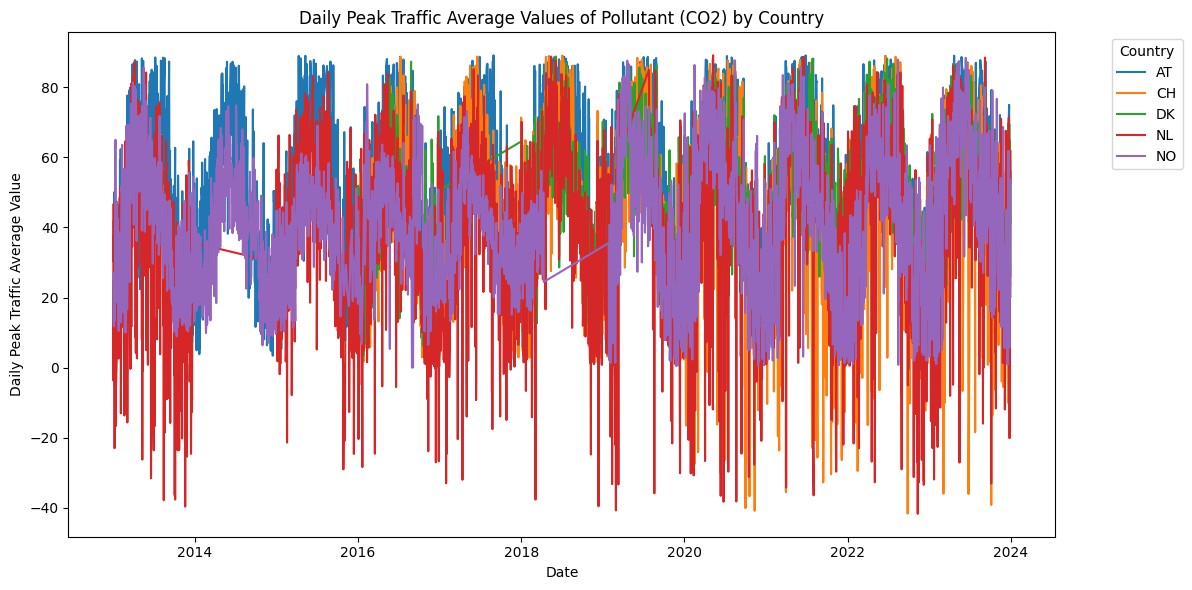

In [ ]:
# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7 # CO2
filtered_data = daily_peak_traffic_avg_per_country[daily_peak_traffic_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Date'], country_data['DailyPeakTrafficAverageValue'], label=country)

plt.title('Daily Peak Traffic Average Values of Pollutant (CO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Peak Traffic Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()